In [1]:
# Importing EBAY data from yahoo finance

In [2]:
import yfinance as yf
# Get the data for tatamotors
ticker = "EBAY"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

ModuleNotFoundError: No module named 'yfinance'

In [3]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 991.0 kB/s eta 0:00:03
     - -------------------------------------- 0.1/3.0 MB 770.8 kB/s eta 0:00:04
     - -------------------------------------- 0.1/3.0 MB 655.4 kB/s eta 0:00:05
     - -------------------------------------- 0.1/3.0 MB 658.7 kB/s eta 0:00:05
     -- ------------------------------------- 0.2/3.0 MB 831.5 kB/s eta 0:00:04
     --- ------------------------------------ 0.2/3.0 MB 860.2 kB/s eta 0:00:04
     --- ------------------------------------ 0.3/3.0 MB 886.2 kB/s eta 0:00:04
     ---- ----------------------------------- 0.3/3.0 MB 912.8 kB/s eta 0:00:03
     ----- ---------------------------------- 0.4/3.0 MB 933.2 kB/s eta 0:00:03
     ----- ---------------------------------- 0.4/3.0 MB 937.3 kB/s eta 0:00:03
     ------ --------------------------------- 0.5/3.0 MB 9

In [4]:
!pip install arch

   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
    -------------------------------------- 20.5/924.9 kB 330.3 kB/s eta 0:00:03
   - ------------------------------------- 41.0/924.9 kB 487.6 kB/s eta 0:00:02
   -- ------------------------------------ 61.4/924.9 kB 409.6 kB/s eta 0:00:03
   --- ----------------------------------- 92.2/924.9 kB 476.3 kB/s eta 0:00:02
   ---- --------------------------------- 102.4/924.9 kB 490.2 kB/s eta 0:00:02
   ------ ------------------------------- 163.8/924.9 kB 577.4 kB/s eta 0:00:02
   ------- ------------------------------ 184.3/924.9 kB 530.7 kB/s eta 0:00:02
   -------- ----------------------------- 204.8/924.9 kB 518.8 kB/s eta 0:00:02
   -------- ----------------------------- 204.8/924.9 kB 518.8 kB/s eta 0:00:02
   --------- ---------------------------- 235.5/924.9 kB 497.3 kB/s eta 0:00:02
   ---------- --------------------------- 245.8/924.9 kB 502.2 kB/s eta 0:00:02
   ------------ ------------------------- 297.0/9

In [5]:
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

In [6]:
# Get the data for eBay
ticker = "EBAY"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [7]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

C:\Users\Prakash R\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004229. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                1855.67
Distribution:                  Normal   AIC:                          -3705.34
Method:            Maximum Likelihood   BIC:                          -3691.48
                                        No. Observations:                  752
Date:                Thu, Jul 25 2024   Df Residuals:                      751
Time:                        18:48:14   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.0794e-04  7.686e-04     -0.271      0.

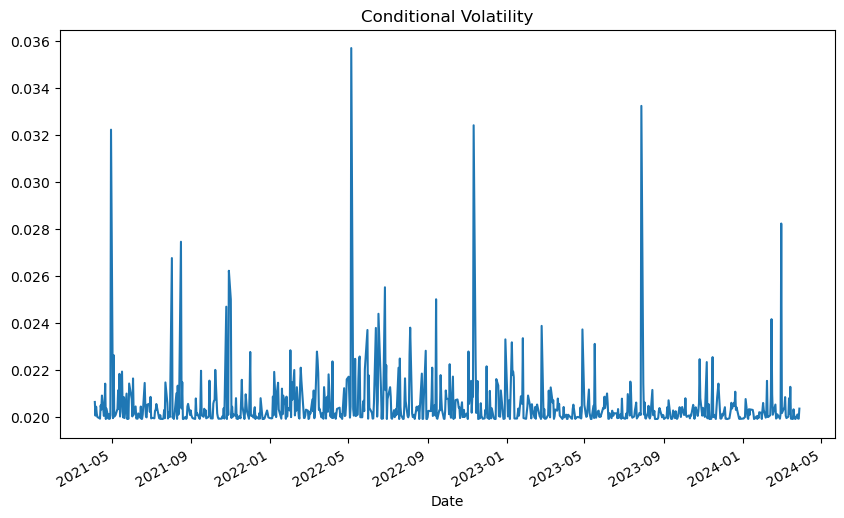

In [8]:
import pandas as pd
from arch import arch_model

# DataFrame is named 'data'

# Calculate daily returns using 'Close' prices
data['Returns'] = data['Close'].pct_change().dropna()

# Drop the first row since it will have NaN value for returns
data = data.dropna(subset=['Returns'])

# Fit an ARCH model
arch_model_fit = arch_model(data['Returns'], vol='ARCH', p=1).fit(disp='off')
print(arch_model_fit.summary())

# Plot the conditional volatility
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
arch_model_fit.conditional_volatility.plot()
plt.title('Conditional Volatility')
plt.show()

In [9]:
# Print the column names of the DataFrame
print(data.columns)

# If 'Returns' is not in the columns, check the available column names
print(data.head())

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns'], dtype='object')
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2021-04-05  63.349998  63.980000  62.549999  63.689999  59.971973  6672800   
2021-04-06  63.630001  63.720001  62.240002  62.520000  58.870281  6396900   
2021-04-07  62.689999  62.689999  61.430000  61.759998  58.154636  5848100   
2021-04-08  62.299999  62.650002  61.759998  62.189999  58.559540  3948400   
2021-04-09  62.080002  62.599998  61.849998  62.470001  58.823196  3801000   

             Returns  
Date                  
2021-04-05  0.009190  
2021-04-06 -0.018370  
2021-04-07 -0.012156  
2021-04-08  0.006962  
2021-04-09  0.004502  


In [10]:
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna() # Volatility

C:\Users\Prakash R\AppData\Local\Temp\ipykernel_21144\2224146025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Returns'] = data['Close'].pct_change().dropna()
C:\Users\Prakash R\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004233. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1852.85
Distribution:                  Normal   AIC:                          -3697.70
Method:            Maximum Likelihood   BIC:                          -3679.22
                                        No. Observations:                  751
Date:                Thu, Jul 25 2024   Df Residuals:                      750
Time:                        18:48:43   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -3.7208e-05  7.601e-04 -4.895e-02      0.

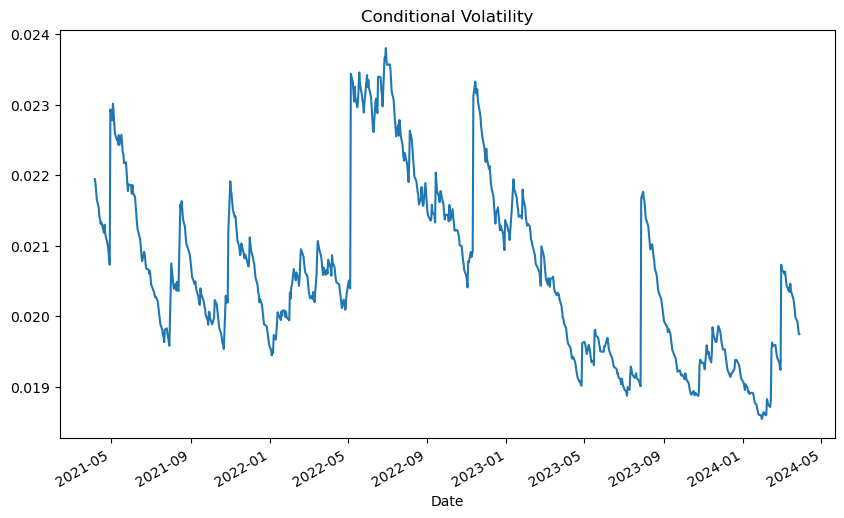

In [11]:
# Calculate daily returns using 'Close' prices
data['Returns'] = data['Close'].pct_change().dropna()

# Drop the first row since it will have NaN value for returns
data = data.dropna(subset=['Returns'])

# Fit a GARCH model
garch_model = arch_model(data['Returns'], vol='Garch', p=1, q=1)
garch_model_fit = garch_model.fit(disp='off')
print(garch_model_fit.summary())

# Plot the conditional volatility
plt.figure(figsize=(10, 6))
garch_model_fit.conditional_volatility.plot()
plt.title('Conditional Volatility')
plt.show()

In [12]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     32,   Neg. LLF: 1717.3719706995398
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1603.3444734046325
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1603.3444734046325
            Iterations: 12
            Function evaluations: 74
            Gradient evaluations: 11


In [13]:
forecasts = res.forecast()

In [14]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [15]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-03-22,52.049999,52.070000,51.400002,51.419998,51.159767,5071900,-0.011154
2024-03-25,51.330002,51.730000,51.189999,51.230000,50.970730,5621400,-0.003695
2024-03-26,51.459999,51.669998,50.880001,51.080002,50.821491,5995800,-0.002928
2024-03-27,51.450001,52.040001,51.410000,51.919998,51.657234,4940600,0.016445
2024-03-28,52.099998,52.930000,52.000000,52.779999,52.512882,6816400,0.016564


In [16]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-03-28  0.010541
                 h.1
Date                
2024-03-28  3.370527
                 h.1
Date                
2024-03-28  3.370527


In [17]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2024-03-28  3.370527  3.368906  3.367286  3.365666  3.364047  3.362429   

                h.07      h.08      h.09      h.10  ...      h.81      h.82  \
Date                                                ...                       
2024-03-28  3.360811  3.359195  3.357579  3.355964  ...  3.243259  3.241699   

               h.83      h.84      h.85      h.86     h.87      h.88    h.89  \
Date                                                                           
2024-03-28  3.24014  3.238581  3.237023  3.235466  3.23391  3.232355  3.2308   

                h.90  
Date                  
2024-03-28  3.229246  

[1 rows x 90 columns]


In [18]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,3.370527,3.368906,3.367286,3.365666,3.364047,3.362429,3.360811,3.359195,3.357579,3.355964,...,3.243259,3.241699,3.24014,3.238581,3.237023,3.235466,3.23391,3.232355,3.2308,3.229246


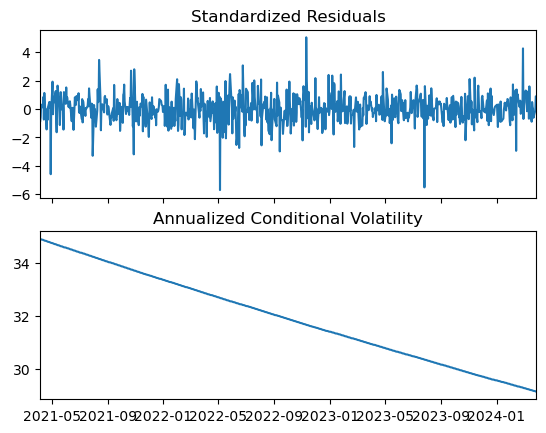

In [19]:
fig = res.plot(annualize="D")